In [2]:
import pandas as pd
from sklearn.cluster import KMeans  
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from pandas.plotting import scatter_matrix
from sklearn.cluster import DBSCAN


In [3]:
data = pd.read_excel('13059_2019_1908_MOESM3_ESM.xlsx')


ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [18]:
data.head().columns

Index(['SampleID', 'BarcodeSequence', 'LinkerPrimerSequence', 'number',
       'emp_study_id', 'doi', 'archive_accession', 'host_taxid',
       'host_scientific_name', 'host_kingdom', 'host_phylum', 'host_class',
       'host_order', 'host_family', 'host_genus', 'host_species',
       'collection_timestamp', 'country', 'elevation_m',
       'microbial_habitat_type', 'internal_habitat_type',
       'digestive_habitat_type', 'external_habitat_type',
       'additional_microbial_habitat_info', 'surrounding_habitat', 'lifestage',
       'captive_wild', 'sampling_month', 'diet', 'trophic_diet',
       'preservation_method', 'extraction_method', 'biogeo_realm',
       'organizer_name', 'PD_whole_tree', 'chao1', 'shannon', 'simpson',
       'observed_otus', 'hostphylo_sampleID', 'host_phylogeny_nDMSproxy',
       'FID', 'latitiude', 'longitude', 'Site_ID', 'Bio1_2_5min',
       'Bio2_2_5min', 'Bio3_2_5min', 'Bio4_2_5min', 'Bio5_2_5min',
       'Bio6_2_5min', 'Bio7_2_5min', 'Bio8_2_5min', 'Bio

In [12]:
main_data=data[['SampleID','host_scientific_name','host_kingdom','host_class','sc_Bio16','sc_Bio17','sc_Bio18','sc_Bio19','sc_Vegetation_density','sc_terrain_complexity','sc_NDVI','Immune_Complexity_Ordinal','Immune_Complexity_Binary']]

In [17]:
set(main_data['host_kingdom'])

{'animalia', 'plantae'}

In [232]:
df = pd.read_csv('otutable.csv')


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252

In [54]:
df=df.rename(columns=df.iloc[0])

In [56]:
df=df.drop(df.index[0])

In [234]:
df=df.T

In [235]:
df

,0,1,2,3,4,5,6,7,8,9,...,17535,17536,17537,17538,17539,17540,17541,17542,17543,17544
# Constructed from biom file,#OTU ID,OTU000001,OTU000002,OTU000003,OTU000004,OTU000006,OTU000007,OTU000008,OTU000009,OTU000010,...,OTU059932,OTU059933,OTU059934,OTU059938,OTU059939,OTU059940,OTU059941,OTU059970,OTU059975,OTU059979
Unnamed: 1,ERR1306253,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unnamed: 2,ERR1306176,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unnamed: 3,ERR1306087,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unnamed: 4,ERR1306170,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unnamed: 250,894.YY965.lane5.NoIndex.L005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unnamed: 251,963.Iguana.78.051611.LAB.vial.661,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unnamed: 252,894.SV1770.lane5.NoIndex.L005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unnamed: 253,894.GV998.lane5.NoIndex.L005,0,50,0,0,3,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df=df.reset_index()

In [62]:
df.rename(columns = {'index':'samples'}, inplace = True)

In [181]:
df2=pd.read_csv('Transposed_OTU.csv', index_col =False)

In [182]:
df2=df2.drop(columns=df2.columns[0])

In [155]:
data=df2[df2.columns[1:]]

In [156]:
data

,OTU000001,OTU000002,OTU000003,OTU000004,OTU000006,OTU000007,OTU000008,OTU000009,OTU000010,OTU000011,...,OTU059932,OTU059933,OTU059934,OTU059938,OTU059939,OTU059940,OTU059941,OTU059970,OTU059975,OTU059979
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,50,0,0,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
fdf=((data-data.min())/(data.max()-data.min())).dropna(axis=1)

In [163]:
fdf.to_csv('Normalized_without_null_values.csv', index=False)

In [644]:
dff=pd.read_csv('Normalized_without_null_values.csv')

In [95]:
fdf=dff

In [124]:
dff['samples']=df2.samples

In [191]:
dff

,samples,OTU000001,OTU000002,OTU000003,OTU000004,OTU000006,OTU000007,OTU000008,OTU000009,OTU000010,...,OTU048280,OTU048290,OTU048295,OTU048299,OTU048322,OTU048333,OTU048335,OTU048346,OTU048350,OTU048354
0,ERR1306253,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,ERR1306176,0.0,0.003226,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,ERR1306087,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,ERR1306170,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,ERR1306014,0.0,0.000000,0.0,0.0,0.009346,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,894.YY965.lane5.NoIndex.L005,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0
250,963.Iguana.78.051611.LAB.vial.661,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
251,894.SV1770.lane5.NoIndex.L005,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0
252,894.GV998.lane5.NoIndex.L005,0.0,0.080645,0.0,0.0,0.028037,0.0,0.0,0.010526,0.0,...,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0


In [160]:
fdf.insert (0, "samples", df2['samples'])

In [162]:
fdf

,samples,OTU000001,OTU000002,OTU000003,OTU000004,OTU000006,OTU000007,OTU000008,OTU000009,OTU000010,...,OTU048280,OTU048290,OTU048295,OTU048299,OTU048322,OTU048333,OTU048335,OTU048346,OTU048350,OTU048354
0,ERR1306253,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,ERR1306176,0.0,0.003226,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,ERR1306087,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,ERR1306170,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,ERR1306014,0.0,0.000000,0.0,0.0,0.009346,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,894.YY965.lane5.NoIndex.L005,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0
250,963.Iguana.78.051611.LAB.vial.661,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
251,894.SV1770.lane5.NoIndex.L005,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,1.0,0.0,1.0,0.000000,0.0,0.0,1.0,0.0,0.0
252,894.GV998.lane5.NoIndex.L005,0.0,0.080645,0.0,0.0,0.028037,0.0,0.0,0.010526,0.0,...,1.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0


In [217]:
d2=df2[df2.columns[1:]].T
d2=d2.reset_index()
d2[d2.columns[1:]]

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2,0,0,0,0,0,0,0,2,...,29,0,0,0,0,0,0,0,50,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,3,0,0,0,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [229]:
def Variance_vs_CP(data,plotname):
#     all_data  = pd.read_csv(filename, index_col=False)
#     data = all_data[all_data.columns[1:]]
    print(data.head())
    pca = PCA().fit(data)
    print("'cumulative explained variance'",len(np.cumsum(pca.explained_variance_ratio_)))
    fig = plt.figure(figsize=(13,13))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.title(plotname)
    fig.savefig('PCA_with_Normalized.png')

In [238]:
def Variance_vs_CP2(data,plotname):
#     all_data  = pd.read_csv(filename, index_col=False)
#     data = all_data[all_data.columns[1:]]
    print(data.head())
    pca = SparsePCA().fit(data)
    print("'cumulative explained variance'",len(np.cumsum(pca.explained_variance_ratio_)))
    fig = plt.figure(figsize=(13,13))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    plt.title(plotname)
    plt.show()
#     fig.savefig('PCA_with_Normalized.png')

In [653]:
Variance_vs_CP2(sqrt_data,"OTU")

   OTU000001  OTU000002  OTU000003  OTU000004  OTU000006  OTU000007  \
0        0.0   0.000000        0.0        0.0   0.000000        0.0   
1        0.0   0.056796        0.0        0.0   0.000000        0.0   
2        0.0   0.000000        0.0        0.0   0.000000        0.0   
3        0.0   0.000000        0.0        0.0   0.000000        0.0   
4        0.0   0.000000        0.0        0.0   0.096674        0.0   

   OTU000008  OTU000009  OTU000010  OTU000011  ...  OTU048280  OTU048290  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        0.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   OTU048295  OTU048299  OTU048322  OTU048333  OTU048335  OTU048346  \
0        0.0        0.0        0.0        0.0

KeyboardInterrupt: 

In [240]:
def PCA_processing(filename):
    all_data  = pd.read_csv(filename, index_col=False)
    data = all_data[all_data.columns[1:]]
    data

    pca = PCA()
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents)
#                  , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
    principalDf

#     CP1= principalDf["principal component 1"].values.tolist()
#     CP2= principalDf["principal component 2"].values.tolist()
#     CP3= principalDf["principal component 3"].values.tolist()
    return principalDf

In [260]:
pca_data=PCA_processing("Normalized_without_null_values.csv")
pca_data

,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,-0.227133,-0.022898,0.177226,-0.152347,-0.135023,0.021992,-0.024568,-0.008706,-0.041826,-0.027935,...,0.025640,0.002752,0.007508,-0.008628,0.160471,-0.002026,0.845850,0.005530,1.908322e-03,2.863860e-15
1,-0.232339,-0.023642,0.185097,-0.158406,-0.141368,0.022811,-0.026689,-0.009934,-0.042533,-0.028752,...,-0.019001,-0.003348,0.001044,0.005886,-0.086132,0.001244,-0.366953,-0.001750,-1.558627e-03,2.863860e-15
2,-0.235196,-0.033687,0.211438,-0.182889,-0.164176,0.020478,-0.031901,-0.031443,-0.042179,-0.007927,...,-0.001022,-0.000294,0.000324,0.000164,-0.002305,0.000029,-0.003692,0.000016,-2.623616e-04,2.863860e-15
3,-0.230415,-0.023380,0.181589,-0.156228,-0.138591,0.022566,-0.025242,-0.009176,-0.043370,-0.029185,...,-0.008844,-0.001433,0.000029,0.001761,-0.025930,0.000347,-0.083563,-0.000171,3.098550e-04,2.863860e-15
4,-0.248373,-0.042237,0.241448,-0.155709,-0.132601,0.019757,0.000761,-0.038645,-0.060136,-0.072576,...,-0.000095,0.000479,-0.000287,0.000252,0.000086,-0.000003,0.000978,0.000193,2.110597e-05,2.863860e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,-0.413013,-0.050986,0.888351,-3.622807,8.148579,-0.692201,0.099478,0.020901,0.011444,0.005574,...,-0.000084,-0.000029,0.000107,0.000039,-0.000253,0.000004,-0.000070,0.000006,-3.142796e-04,2.863860e-15
250,-0.270230,-0.049273,0.327042,-0.349513,-0.335340,0.023473,-0.076290,-0.017291,-0.236662,-0.194164,...,-0.000176,-0.000041,0.000064,0.000064,-0.000429,0.000008,-0.000119,0.000017,-2.678700e-08,2.863860e-15
251,-0.476619,-0.063532,0.816381,-4.210332,9.961315,-0.899108,0.122333,-0.006626,0.331644,0.216772,...,-0.000174,-0.000028,0.000026,0.000028,-0.000302,0.000005,-0.000084,0.000012,4.758337e-05,2.863860e-15
252,0.449858,1.055468,0.240712,-0.015836,-0.086498,0.319012,-0.089218,-0.051640,-0.170482,0.010301,...,0.000483,-0.000073,0.000852,0.000042,-0.000355,0.000009,-0.000131,0.000020,-2.288694e-04,2.863860e-15


In [658]:
np.sqrt(pca_data)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,244,245,246,247,248,249,250,251,252,253
0,NaN,NaN,0.420982,NaN,NaN,0.148296,NaN,NaN,NaN,NaN,...,0.160124,0.052460,0.086651,NaN,0.400589,NaN,0.919701,0.074361,0.043684,5.351505e-08
1,NaN,NaN,0.430229,NaN,NaN,0.151032,NaN,NaN,NaN,NaN,...,NaN,NaN,0.032318,0.076720,NaN,0.035273,NaN,NaN,NaN,5.351505e-08
2,NaN,NaN,0.459823,NaN,NaN,0.143101,NaN,NaN,NaN,NaN,...,NaN,NaN,0.018006,0.012790,NaN,0.005350,NaN,0.004012,NaN,5.351505e-08
3,NaN,NaN,0.426132,NaN,NaN,0.150220,NaN,NaN,NaN,NaN,...,NaN,NaN,0.005390,0.041960,NaN,0.018640,NaN,NaN,0.017603,5.351505e-08
4,NaN,NaN,0.491374,NaN,NaN,0.140561,0.027591,NaN,NaN,NaN,...,NaN,0.021895,NaN,0.015881,0.009267,NaN,0.031271,0.013891,0.004594,5.351505e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,NaN,NaN,0.942524,NaN,2.854572,NaN,0.315401,0.144570,0.106974,0.074656,...,NaN,NaN,0.010320,0.006233,NaN,0.001892,NaN,0.002530,NaN,5.351505e-08
250,NaN,NaN,0.571876,NaN,NaN,0.153210,NaN,NaN,NaN,NaN,...,NaN,NaN,0.007989,0.007990,NaN,0.002890,NaN,0.004080,NaN,5.351505e-08
251,NaN,NaN,0.903538,NaN,3.156155,NaN,0.349762,NaN,0.575886,0.465588,...,NaN,NaN,0.005069,0.005250,NaN,0.002165,NaN,0.003396,0.006898,5.351505e-08
252,0.670715,1.027360,0.490625,NaN,NaN,0.564811,NaN,NaN,NaN,0.101492,...,0.021969,NaN,0.029186,0.006446,NaN,0.003016,NaN,0.004483,NaN,5.351505e-08


In [649]:
bic_list = []
labels = []
for n in range(1,10):
        
        models = GMM(n_components = n).fit(sqrt_data)
        print(models.means_)
        bic_list.append(sqrt_data)
        labels.append(sqrt_data)

[[0.01219952 0.02684171 0.00672089 ... 0.00393701 0.00393701 0.00393701]]


KeyboardInterrupt: 

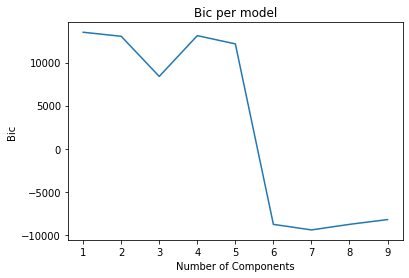

In [576]:
fig2 = plt.figure(1)
plt.plot(range(1,10),bic_list)
plt.xlabel("Number of Components")
plt.ylabel("Bic")
plt.title("Bic per model")
plt.show()
fig2.savefig('bic.png')

In [651]:
models = GMM(n_components =2 ).fit(sqrt_data)
labels=models.predict(sqrt_data)

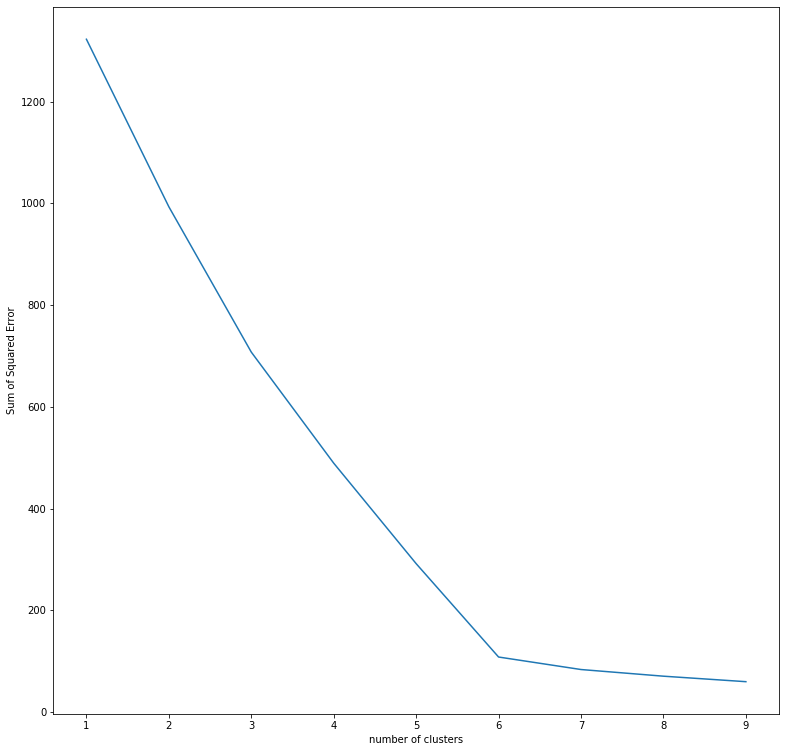

In [635]:
sse_set = []
for ii in range(1,10):
    cls = KMeans(n_clusters=ii).fit(pca_data[pca_data.columns[0:5]])
    sse_set.append(cls.inertia_)
fig9 = plt.figure(figsize=(13,13))
plt.plot(range(1,10),sse_set)
plt.xlabel('number of clusters')
plt.ylabel('Sum of Squared Error');
plt.show()
fig9.savefig('kmeans')    

In [662]:
cls = KMeans(n_clusters=6).fit(pca_data[pca_data.columns[0:5]])


In [474]:
cls=DBSCAN().fit(pca_data)
labels=cls.labels_    

In [ ]:
color_num = {0: "#7b3294", 1: "#008837", 2: "#c2a5cf", 3: "#a6dba0", 4:"yellow",5:'green',6:'orange',7:'brown',8:'grey'}

In [ ]:
color_set = [color_num[num] for num in labels]

<Figure size 432x288 with 0 Axes>

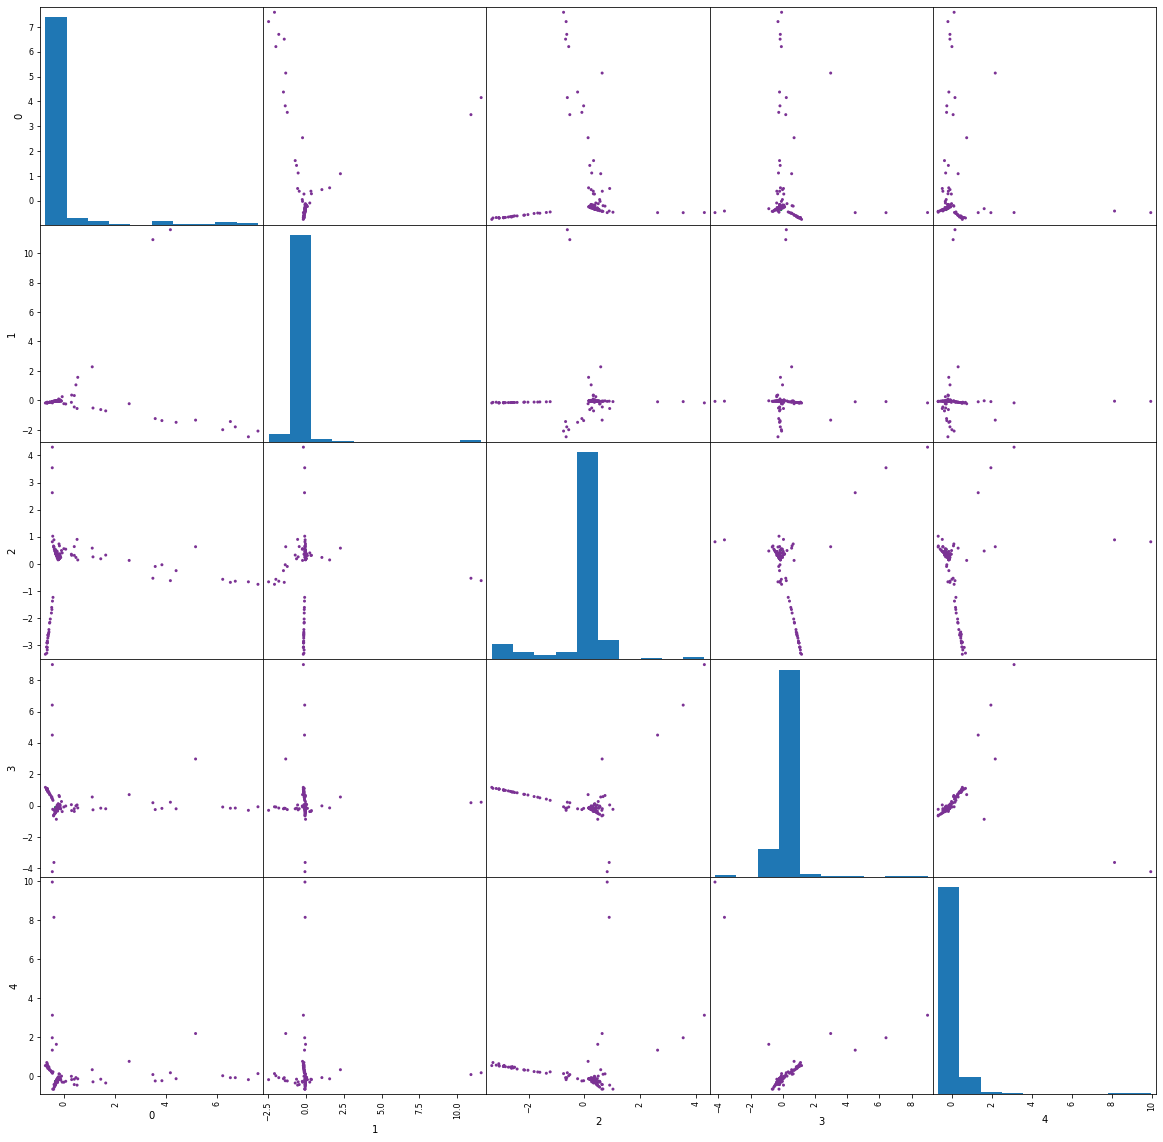

In [663]:
fig99 = plt.figure()
savefi=scatter_matrix(pca_data[pca_data.columns[:5]], alpha=1, figsize=(20,20) ,c=color_set)
# labels=["Label A", "Label B", "Label C"]
# plt.legend(savefi, [str(i) for i in range(5)], loc=(1.02,0))
plt.show()
# fig99.savefig('scatter_matrix_pca')

In [486]:
cls.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)